In [15]:
%matplotlib inline
%run talktools.py

In [16]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Handling GIS information

## Open data availability



The government is going to an open data policy, making more and more datasets available to the public. 

For example, City Ghent has an open data platform [Open data portal Ghent](https://data.stad.gent), with for example information about the districts, called *wijken*:

In [25]:
from IPython.display import IFrame

In [26]:
IFrame("https://data.stad.gent/datasets/wijken", width=850, height=300)

## Reading the data
Reading in the data: to visualize it, explore it and use it for our own research/purpose:

In [90]:
import urllib

In an ideal world, reading directly from the raw data source enables a transparent workflow:

In [102]:
response = urllib.request.urlopen('http://datatank.stad.gent/4/grondgebied/wijken.json')
str_response = response.read().decode('utf-8')
data = json.loads(str_response)

But I could as well read it in from the downloaded file on my PC:

In [99]:
import json

with open('wijken.json') as f:
    data = json.load(f)

Translation towards the data I really need, a GIS set of vector Polygons, called $\texttt{wijken_gent}$:

In [100]:
wijken = {}
for region in data['Document']['Folder']['Placemark']:
    coordinaten = region['Polygon']['outerBoundaryIs']['LinearRing']['coordinates']['@text']
    coordclean = [coordcouple[:-2] for coordcouple in coordinaten.split(' ')]
    wijknaam = region['ExtendedData']['SchemaData']['SimpleData'][4]['@text']
    wijken[wijknaam] = Polygon([(float(ccc.split(',')[0]), float(ccc.split(',')[1])) for ccc in coordclean])
temp = gpd.GeoSeries([shape for shape in wijken.values()])
wijken_gent = gpd.GeoDataFrame(temp)
wijken_gent.columns = ['geometry']
wijken_gent['names'] = wijken.keys()    

Plotting the districts of Ghent:

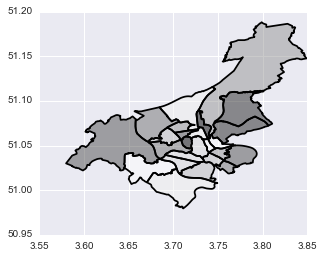

In [105]:
ax = wijken_gent.plot()

However, it would be more interesting to show this on a background of a map like google maps or openstreetmap.

## Rendering a map:

To render it on top of a map, a tool enables the combination of figures and open street map, supported by the interactivity and **web-technology of the notebook**:

In [23]:
import mplleaflet

In [24]:
mplleaflet.display(fig=ax.figure, )